### 계단함수 구현하기
특정 값 이상일 때 1을 출력하는 함수를 계단함수라고 한다

In [101]:
def step_function(x):
  if x>0 :
    return 1
  else :
    return 0

In [102]:
# step_function(10)
step_function(-0.6)

0

In [103]:
# 파라미터로 넘파이 배열도 받도록 수정해보자
import numpy as np
def step_function(x) :
  y= x>0
  return y.astype(np.int)


### 넘파이 배열에 부등호 연산하기
넘파이 배열에 부등호 연산을 할 경우 연산 결과가 담긴 **bool 배열**이 생성된다

In [104]:
# 넘파이 배열인 x의 값을 지정해보자
x = np.array([-1.0, 1.0, 2.0])
x

# x에 부등호 연산을 수행
y = x > 0
y

array([False,  True,  True])

In [105]:
# 위 값을 int형으로 변환해주자
# 배열 내 bool값이 int타입으로 바뀐다
y = y.astype(int)
y

array([0, 1, 1])

### 3.2.3. 계단함수의 그래프
위에서 정의한 함수로 그래프를 그려보자

<ipython-input-106-8e3ff1977e3e>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0 ,dtype=np.int)


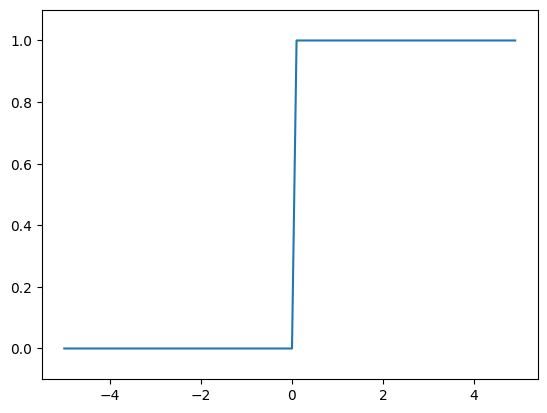

In [106]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0 ,dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x) # 배열을 계단함수에 넣어준다

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정한다
plt.show()

### 시그모이드 함수 구현하기

In [107]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [108]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

# array([0.26894142, 0.73105858, 0.88079708]) # x의 원소를 시그모이드 함수에 하나하나 넣으면 이 값이 차례로 나온다

array([0.26894142, 0.73105858, 0.88079708])

### BroadCasting
넘파이 배열과 스칼라값을 연산하면, 넘파이 배열 원소 각각과 스칼라값을 연산한 값을 원소로 하는 배열을 반환한다

In [109]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t
# array([2., 3., 4.])
1.0 / t
# array([1.        , 0.5       , 0.33333333])

array([1.        , 0.5       , 0.33333333])

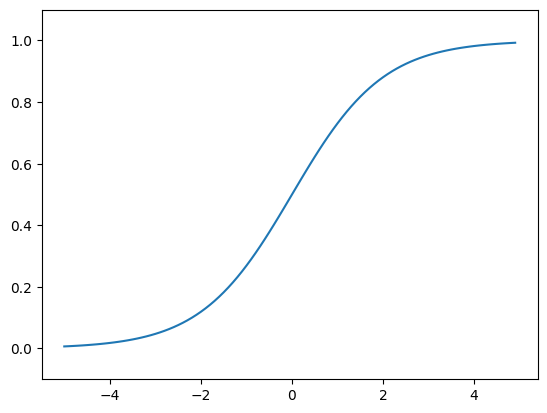

In [110]:
# 시그모이드함수를 그래프로 그려보자
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.7. ReLU함수
입력이 0이상일 때 값을 그대로 출력한다

In [111]:
# ReLU함수 구현
def relu(x):
  return np.maximum(0,x) # 둘 중 큰 값을 반환한다. x가 0보다 클 경우에만 그 값이 반환된다

In [112]:
relu(10)

10

### 3.3. 다차원 배열의 계산

In [113]:
# 1차원 배열 : 수를 일렬로 늘어 놓은 것

import numpy as np
A = np.array([1, 2, 3, 4])
A

array([1, 2, 3, 4])

In [114]:
np.ndim(A) # 해당 배열의 차원(dimention)을 반환

1

In [115]:
A.shape

(4,)

In [116]:
A.shape[0]

4

In [117]:
# 2차원 배열을 작성해보자
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B)) # B의 차원
print(B.shape) # B의 크기

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [118]:
# 행렬의 곱 1 : 2x2 2x2
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [119]:
# 행렬의 곱 1 : 2x3 3x2
A = np.array([[1,2,3],[4,5,6]])
print('A의 크기', A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print('B의 크기', B.shape)
np.dot(A,B)

A의 크기 (2, 3)
B의 크기 (3, 2)


array([[22, 28],
       [49, 64]])

In [120]:
# 곱하려는 행렬의 크기가 맞지 않는 경우 (A 열의 수 != B의 행의 수)
C = np.array([[1,2],[3,4]])
print('C의크기', C.shape)
print('A의 크기', A.shape)

np.dot(A,C) # 오류가 출력된다

C의크기 (2, 2)
A의 크기 (2, 3)


ValueError: ignored

### 신경망에서의 행렬 곱

In [121]:
# 2개의 입력에 출력은 3개의 노드. 입력 각각에 가중치를 곱해보자 ㅠㅠ
X = np.array([1,2])
print('행렬 X\n',X)
print('X의 크기',X.shape)
W = np.array([[1,3,5], [2,4,6]])
print('행렬 W\n',W)
print('W의 크기',W.shape)

행렬 X
 [1 2]
X의 크기 (2,)
행렬 W
 [[1 3 5]
 [2 4 6]]
W의 크기 (2, 3)


In [122]:
# (앞 행렬의 열) == (뒤 행렬의 행) 이므로 행렬곱 가능

Y = np.dot(X,W)
print(Y)

[ 5 11 17]


# 신경망을 코드로 표현해보자

In [123]:
X = np.array([1.0, 0.5]) # 입력
W1 = np.array([[0.1,0.3,0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [124]:
# 1층의 신경망을 구해보자
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [125]:
Z1 = sigmoid(A1)
print(A1)
print(Z1) # 시그모이드 함수 거친 값

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [126]:
# 1층에서 2층의 뉴런을 만들어보자
W2 = np.array([[0.1, 0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # 1층 뉴런
print(W2.shape) # 2층 만들때 곱하는 가중치
print(B2.shape) # 2층 만들때의 편향

A2 = np.dot(Z1,W2) + B2 # 1층 뉴런 * (to2층) 가중치 + (to2층) 편향
Z2 = sigmoid(A2) # 2층의 뉴런을 시그모이드 함수에 넣어 가공된 값을 반환 받는다

print('A2 :', A2)
print('Z2 :', Z2)


(3,)
(3, 2)
(2,)
A2 : [0.51615984 1.21402696]
Z2 : [0.62624937 0.7710107 ]


In [130]:
# 마지막!!!!! 2층 > 출력층 신호전달을 작성하자!
# 출력층으로의 신호전달은 활성화함수만 다르다
# 출력층으로의 활성화함수는 받는 값을 그대로 표현한다(항등함수. x=y)

def identity_function(x):
  return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]
